# Cosmological Distances

A comparison of the different type of measures of cosmological distances as a function of redshift $z$:
1. Comoving distance
2. Angular diameter distance
3. Luminosity distance
4. Hubble distance

In [5]:
from numpy import *
from pylab import *
from scipy.integrate import quad

In [6]:
# Integrand 1/E(z) for comoving distance, where E(z) is dimensionless

# Define the methods

# Hubble constant at redshift z (eq. 14 in Hogg 2000)
def ez(z,om):
    return 1.0/sqrt(om*pow(1.0+z,3.0)+1.0-om)

# Comoving distance (eq. 15 in Hogg 2000)
def dc(z,om,h0):
    return 299792.458*quad(ez,0.0,z,args=(om))[0]/h0

# Angular diameter distance (eq. 18 in Hogg 2000)
def da(z,om,h0):
    return dc(z,om,h0)/(1.0+z)

# Luminosity distance (eq. 21 in Hogg 2000)
def dl(z,om,h0):
    return (1.0+z)*dc(z,om,h0)

# Hubble distance DH(z) = c * z / H_0
def dh(z,h0):
    return 299792.458*z/h0

In [7]:
# define the constants

# Hubble constant and Omega_M
h0=71.0
om=0.27

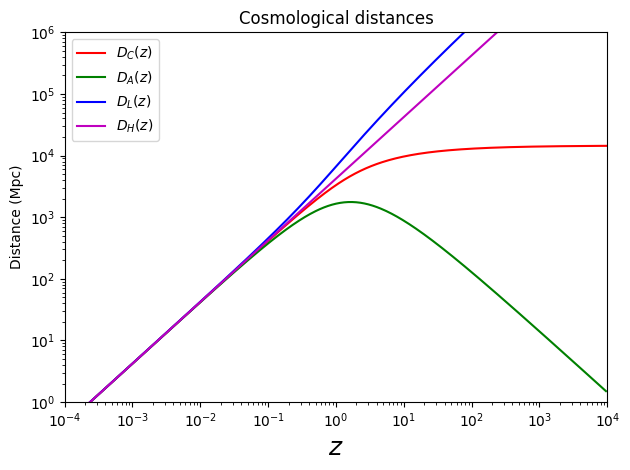

In [8]:
# Cosmological distances as functions of redshift z
zz=[pow(10.0,x) for x in arange(-4.0,4.0,0.02)]
dcz=[dc(z,om,h0) for z in zz]
daz=[da(z,om,h0) for z in zz]
dlz=[dl(z,om,h0) for z in zz]
dhz=[dh(z,h0) for z in zz]

# Plot the results
plot(zz,dcz,'r-',zz,daz,'g-',zz,dlz,'b-',zz,dhz,'m-')
xscale('log')
yscale('log')
xlim(1.0e-4,10000.0)
ylim(1.0,1000000.0)
xlabel('$z$',fontsize=18)
ylabel('Distance (Mpc)')
legend(['$D_C(z)$','$D_A(z)$','$D_L(z)$','$D_H(z)$'],loc=2)
title('Cosmological distances')

# Save the figure
tight_layout()
savefig("cosm_dist.jpg",dpi=300,bbox_inches="tight")
show()